#### Programming and Algorithms (Apprenticeship) Assessment 1

The aim of this assessment is to test your knowledge of Python programming for data science up to this point in the module. There are a number of tasks to complete. You will find it useful to look over the various example programs from Weeks 1-8 of the module to get some ideas of the Python statements and libraries that you will need. It leads you through some early stages of the data science pipeline: data ingress, cleaning data, and carrying out some initial descriptive exploration and visualisation of the dataset.

This assessment is focused on the following knowledge, skills and behaviours:
- K1. "The context of Data Science...in relation to computer science."
- K5.1/5.2. "Sources of data...", and "Data formats, structures"
- S2. "Perform data engineering: create and handle datasets for analysis..."
- S3. "Identify and use an appropriate range of programming languages and tools for data manipulation, analysis, visualisation,"

This assessment is concerned with analysing a dataset, called *DecemberSales_studentNumber.xlsx*, where *studentNumber* is your student number. This represents online orders for four products from a UK-based company in December 2020. You should ensure that this file is in the same folder as your notebook. Some of the questions will require you to do coding (these are marked with "Coding Task"), and some to make comments (these are marked with "Question"). 

For the coding tasks, you should endeavour to write code that is as general as possible for the task; for example, you should avoid where possible naming particular cells in the data, make sure that the computer is doing any calculations that need to be done, and imagine that your code might be applied to an arbitrary data-set with the same structure.

Coding Task: In the following block, import the pandas data processing library, and rename it as "pd" for the remainder of the sheet (1 line).

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt #this imports the plotting library

Coding Task: In the following block, import the *DecemberSales_studentNumber.xlsx* file and give it the variable name *sales*. Print out *sales* to check that it has been correctly imported, and so that you can take a quick look at the data. You should be able to see a Date column and four columns for different products (SKUs - Stock Taking Units).

In [5]:
sales = pd.read_excel(r'DecemberSales_20416354.xlsx', header=0)
print(sales)

    Date  SKU14256  SKU13526  SKU15276  SKU13425
0    1st       287       348       506         0
1    2nd       315       401       547        10
2    3rd       335       344       592       110
3    4th       281       344       585       281
4    5th       348       360       566         0
5    6th       288       385       566         0
6    7th       302       323       669       208
7    8th         0       376       677         0
8    9th       298       349       615         0
9   10th       329       309       632        30
10  11th       318       388       680       270
11  12th       319       313       648        19
12  13th       330       352      1111         0
13  14th       280       402       693         0
14  15th       287       348       738        61
15  16th       291       392       787         0
16  17th       276       361       791         0
17  18th       299       344       768         0
18  19th       292       352       785         0
19  20th       265  

If you have done this correctly, the next block should display a bar chart of the column *SKU13526*.

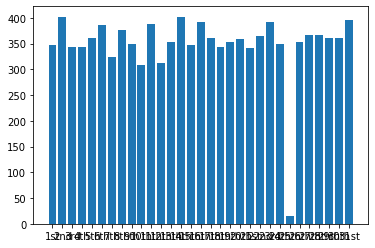

In [4]:
plt.bar(list(sales["Date"]),list(sales["SKU13526"]));

Coding Task: We could repeat this for all four products, but it would be more concise if they were plotted on a single chart. Bars on a bar chart would get in the way of each other, so perhaps a better solution is to have a line for each product (there is a counter-argument that you should not display discrete data using a continuous line, but this seems to be the best compromise). Find out how to do line plots and to put multiple plots on a single plot. This might take a little investigation. In the next block, using what you have discovered, plot all four products as line plots on the same chart. (around 5 lines)

['SKU14256', 'SKU13526', 'SKU15276', 'SKU13425']


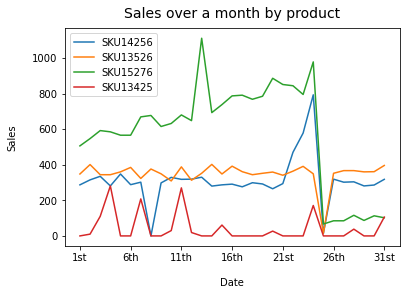

In [22]:
products = []
for i in list(sales.columns):
    if i != 'Date':
        products.append(i)
print(products)

ax = plt.gca()

#sales.plot( x = 'Date' , y = 'SKU14256', ax = ax )
#sales.plot( x = 'Date' , y = 'SKU13526', ax = ax )
#sales.plot( x = 'Date' , y = 'SKU15276', ax = ax )
#sales.plot( x = 'Date' , y = 'SKU13425', ax = ax )

for j in products:
    sales.plot( x = 'Date' , y = j, ax = ax )

plt.xlabel("Date", labelpad=15)
plt.ylabel("Sales", labelpad=15)
plt.title("Sales over a month by product", y=1.02, fontsize=14);

Coding Task: in the next block, calculate some simple descriptive statistics for the four products (in particular the range, mean and standard deviation for each column). There is a single pandas command to do this. (1 line using that command, otherwise about 12 lines)

In [23]:
sales.describe()

,SKU14256,SKU13526,SKU15276,SKU13425
count,31.000000,31.000000,31.000000,31.000000
mean,312.903226,348.806452,579.516129,42.935484
std,132.410059,66.251752,295.915176,81.201369
min,0.000000,15.000000,67.000000,0.000000
25%,286.500000,346.000000,526.500000,0.000000
50%,299.000000,359.000000,648.000000,0.000000
75%,319.000000,371.500000,786.000000,34.000000
max,793.000000,402.000000,1111.000000,281.000000


Question: in the next block, make at least four observations on the sales data. This could include comments on trends (or lack of) in the data, variability from day-to-day, distinctive data points, comparisons between the different products, etc.

- There were very few sales on the 25th December
- Sales of SKU15276 were the higher and steadily increasing before the 25th, but stable and low from the 26th onwards
- Sales of SKU13526 were consistent apart from a drop on 25th
- SKU13425 would often have 0 sales, but would show peaks over time.
- SKU14256 had a real peak in sales in the few days before 25th before returning to a consistent level 
- On average, SKU14256 and SKU13526 had a similar average daily sales

Question: There are two "dirty" data points in the dataset. Which do you think these are, and why are they dirty?

SKU14256 on the 8th and SKU15276 on the 13th - these data points are single events that do not follow the trends observed within their subset or the overall trend of the whole dataset - so they look to be outliers. 

Coding Task and Question: By looking back at the tutorial on missing values, choose a method for filling in these missing data values (you should use a different approach for each). In the next three blocks:
- include your code for this (about 10 lines)
- explain your approaches
- re-plot the chart from earlier to check that your approach has been effective

In [108]:
#update data for SKU15276 by taking the average of the points either side of the 'dirty' value
SKU15276 = list(sales.SKU15276)
salesSKU15276 = [ (x if x < 1000 else int((SKU15276[i-1]+SKU15276[i+1])/2))
                                    for i,x in enumerate(SKU15276) ]

#update data for SKU14256 by taking the average of all the good value prior to 21st
index = 0
for i in list(sales.Date):
    if i == '21st':
        break
    index += 1
#print(index)

SKU14256 = list(sales.SKU14256)
SKU14256missing = []
for i,x in enumerate(SKU14256):
    if i <= index2:
        if x!= 0:
            SKU14256missing.append(x)
SKU14256average = (sum(SKU14256missing)/len(SKU14256missing))
salesSKU14256 = [x if x !=0 else int(SKU14256average) for x in SKU14256]

#Update dataframe with revised lists
sales.SKU15276 = salesSKU15276
sales.SKU14256 = salesSKU14256

For SKU15276 the data is trending updwards, so rather than take the overall average it makes sense to take an average of the values either side of the 'dirty' data point. Taken an average of the whole dataset would likely lead to data point that does not fit in with the trend.

For SKU14256 the data before the 21st is pretty consistent, so an average of the time period makes sense. Since the data after the 21st shows some different behaviour, only calculating an average of the data before this time is more appropriate to avoid creating data that does not align to the trend.

['SKU14256', 'SKU13526', 'SKU15276', 'SKU13425']


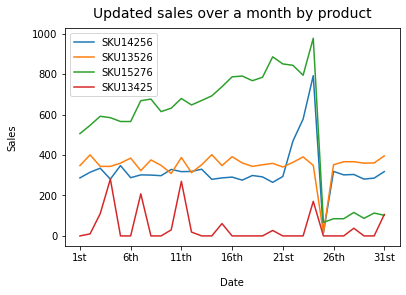

In [100]:
products = []
for i in list(sales.columns):
    if i != 'Date':
        products.append(i)
print(products)

ax = plt.gca()

for j in products:
    sales.plot( x = 'Date' , y = j, ax = ax )

plt.xlabel("Date", labelpad=15)
plt.ylabel("Sales", labelpad=15)
plt.title("Updated sales over a month by product", y=1.02, fontsize=14);

Coding Task: For SKU13425, you would like to understand better why there are sales on some days but not others. In the next block, write code that prints a list of the dates on which that product had non-zero sales. You can either use a combination of a for loop and an if statement, or a list comprehension.

In [105]:
index = 0
for i in sales.SKU13425:
    if i!=0:
        print(sales.Date[index],sales.SKU13425[index])
    index+=1

2nd 10
3rd 110
4th 281
7th 208
10th 30
11th 270
12th 19
15th 61
20th 27
24th 171
28th 38
31st 106


Question: Why do we not deal with the zeros for SKU13425 as missing values (as we did with the zero in another column in the work above)? Briefly answer this question in the next block.

Because the product SKU13425 has lots of zero values, it suggests that the data is not missing but indicative of a trend in that data - either it is just not a very popular product or there is a pattern to why people buy it on certain days. If all the zeros were removed it would be a challenge to understand what was going on. 

Okay, that's the end of the assessment. Please upload this to "Assessment 1" on Moodle.